# CSCE 623 Homework Assignment 3
## Student Name: David Crow
## Date: 21 April 2019

In [1]:
"""
HW2
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## STEP 1:
Load the dataset

In [2]:
# the files are called 'datset<n>.csv,' where 'n' is a number between 1 and 3
# I changed the names to 'dataset<n>.csv' under the assumption that 'datset' is a typo
# if you meant to prefix them with 'datset,' just change the prefix variable below from 'dataset' to 'datset'

prefix = "dataset"

df1 = pd.read_csv(prefix + "1.csv", index_col=0)
df2 = pd.read_csv(prefix + "2.csv", index_col=0)
df3 = pd.read_csv(prefix + "3.csv", index_col=0)

## STEP 2:
Explore the dataset

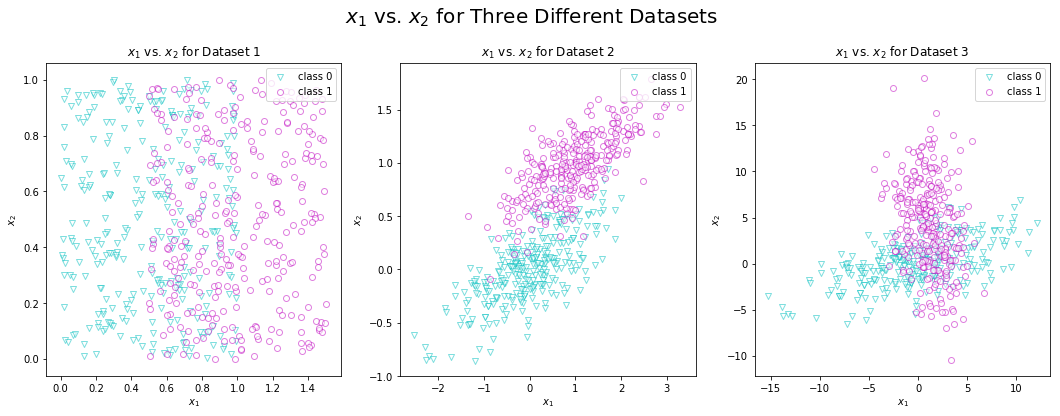

In [3]:
# create the overall figure
fig = plt.figure(figsize=(18,6))
fig.suptitle('$x_1$ vs. $x_2$ for Three Different Datasets', fontsize=20)
fig.subplots_adjust(top=0.85)

# we need three subplots (one for each dataset)
ax = [
    fig.add_subplot(131),
    fig.add_subplot(132),
    fig.add_subplot(133)
]

# n iterates through the different subplots
n = 0

# for each dataset...
for df in (df1, df2, df3):
    # plot the current dataset on the nth subplot
    ax[n].scatter(df[df['2'] == 0]['0'], df[df['2'] == 0]['1'], label="class 0", marker='v', alpha=0.5, edgecolors='c', facecolors='w')
    ax[n].scatter(df[df['2'] == 1]['0'], df[df['2'] == 1]['1'], label="class 1", alpha=0.5, edgecolors='m', facecolors='w')
    
    # pretty-fy the nth subplot
    ax[n].set_title("$x_1$ vs. $x_2$ for Dataset " + str(n + 1))
    ax[n].set_xlabel("$x_1$")
    ax[n].set_ylabel("$x_2$")
    ax[n].legend(loc=1)

    n += 1

## Step 3:

#### What do you notice about the distribution of the data?

- Dataset 1
  - $x_1$ is uniformly distributed between 0.0 and 1.0 for class 0 and between 0.5 and 1.0 for class 1
  - $x_2$ is uniformly distributed between 0.0 and 1.0 for both classes
- Dataset 2
  - $x_1$ is normally distributed between -2 and 2 for class 0 (plus a few obvious outliers) and between -1.5 and 3.5 for class 1
  - $x_2$ is normally distributed between -1 and 1 for class 0 and between 0 and 2 (plus one obvious outlier) for class 1
- Dataset 3
  - $x_1$ is normally distributed between -15 and 15 for class 0 and between -5 and 5 (plus a few obvious outliers) for class 1
  - $x_2$ is normally distributed between -7.5 and 7.5 for class 0 and between -7.5 and 20 (plus a few obvious outliers) for class 1

#### What can you say about the covariance of the two classes?
todo
- Dataset 1:
- Dataset 2:
- Dataset 3:

#### Between classes, are the variances of a single feature equal? 
todo
- Dataset 1:
- Dataset 2:
- Dataset 3:

#### How well are the classes separated?
todo
- Dataset 1:
- Dataset 2:
- Dataset 3:

#### Which predictor do you think will work best under this condition (Logistic Regression, LDA, or QDA)… and why? 
todo
- Dataset 1:
- Dataset 2:
- Dataset 3:

## Step 4:
Define a function to split the dataset into test and training data

In [4]:
def splitDataset(df, number_of_training_points):
    # compute the percentage of points to take for training
    train_ratio = number_of_training_points / df.shape[0]
    
    # pull proportionate numbers of points from class 0 and class 1
    train0 = df[df['2'] == 0].sample(frac=train_ratio)
    train1 = df[df['2'] == 1].sample(frac=train_ratio)
    
    # combine the training points for each class into one training set (dataframe)
    train = train0.append(train1)
    
    # the set of testing points consists of all points not already selected for training
    # so we can combine the original dataframe and the training dataset and remove all duplicates
    # 'keep=False' ensures we don't even keep the first observation in a set of duplicate observations
    test = pd.concat([df, train]).drop_duplicates(keep=False)
    
    return train, test

## Step 5:
Fit each of {LR, LDA, QDA} to each dataset

#### We need to split the datasets before fitting any models.
Let's define three lists: `df1_models`, `df2_models`, and `df3_models`. Each list will contain three items: an LR model, an LDA model, and a QDA model. We're structuring our code this way to reduce duplicate code and to combine similar items into fewer data structures.

When all is said and done, we can access, for example, QDA for dataset 3 with `df3_models[2]`. This should allow for cleaner code. However, we do lose a little bit of simplicity.

In [5]:
# split all three datasets into testing/training datasets
train1, test1 = splitDataset(df1, df1.shape[0] / 2)
train2, test2 = splitDataset(df2, df2.shape[0] / 2)
train3, test3 = splitDataset(df3, df3.shape[0] / 2)

# 0: LR, 1: LDA, 2: QDA
df1_models = []
df2_models = []
df3_models = []

#### Fit a model to the training set for Logistic Regression.

In [6]:
# dataset 1
df1_models.append(LogisticRegression(solver="newton-cg"))
df1_models[0].fit(train1[["0", "1"]], train1[["2"]].values.ravel())

# dataset 2
df2_models.append(LogisticRegression(solver="newton-cg"))
df2_models[0].fit(train2[["0", "1"]], train2[["2"]].values.ravel())

# dataset 3
df3_models.append(LogisticRegression(solver="newton-cg"))
df3_models[0].fit(train3[["0", "1"]], train3[["2"]].values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### Fit a model to the training set for Linear Discriminant Analysis.

In [7]:
# dataset 1
df1_models.append(LinearDiscriminantAnalysis())
df1_models[1].fit(train1[["0", "1"]], train1[["2"]].values.ravel())

# dataset 2
df2_models.append(LinearDiscriminantAnalysis())
df2_models[1].fit(train2[["0", "1"]], train2[["2"]].values.ravel())

# dataset 3
df3_models.append(LinearDiscriminantAnalysis())
df3_models[1].fit(train3[["0", "1"]], train3[["2"]].values.ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Fit a model to the training set for Quadratic Discriminant Analysis.

In [8]:
# dataset 1
df1_models.append(QuadraticDiscriminantAnalysis())
df1_models[2].fit(train1[["0", "1"]], train1[["2"]].values.ravel())

# dataset 2
df2_models.append(QuadraticDiscriminantAnalysis())
df2_models[2].fit(train2[["0", "1"]], train2[["2"]].values.ravel())

# dataset 3
df3_models.append(QuadraticDiscriminantAnalysis())
df3_models[2].fit(train3[["0", "1"]], train3[["2"]].values.ravel())

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

## Step 6:
For each classifier, use the test set to determine the probabilities for which each classifier believes each datapoint belongs to class 1

In [9]:
probs1 = []
probs2 = []
probs3 = []

# for each model...
for i in range(3):
    # for a given classifer, we need to predict the probability of each class in our training set
    # we then need to select only the column that contains the probabilities for class 1
    probs1.append(df1_models[i].predict_proba(test1[["0", "1"]])[:,1])
    probs2.append(df2_models[i].predict_proba(test2[["0", "1"]])[:,1])
    probs3.append(df3_models[i].predict_proba(test3[["0", "1"]])[:,1])

probs1 = np.array(probs1)
probs2 = np.array(probs2)
probs3 = np.array(probs3)

## Step 7:
Define `getROCdata(truthVals, probs, thresholds)`

In [10]:
def getROCdata(truthVals, probs, thresholds):
    tpc = []
    fpc = []
    tnc = []
    fnc = []
    
    for threshold in thresholds:
        preds = probs.copy()

        # for each element, check whether the element is greater than or equal to the threshold
        # then convert the boolean values into 0s and 1s
        preds = (preds >= threshold).astype(int)

        # if we scale up our predictions (by something larger than 2),
        # then we can sum our truthVals and predictions and identify true/false positives/negatives
        weighted_sum = 10 * preds + np.array(truthVals).ravel()

        # num_freqs stores each unique number as a key and the frequency of that number as the key's value
        num, counts = np.unique(weighted_sum, return_counts=True)
        num_freqs = dict(zip(num, counts))

        # if the key doesn't exist in the dict, Python says the value is None
        # so we replace all None values with 0
        tpc.append(0 if num_freqs.get(11) is None else num_freqs.get(11)) # prediction: 10, actual: 1
        fpc.append(0 if num_freqs.get(10) is None else num_freqs.get(10)) # prediction: 10, actual: 0
        fnc.append(0 if num_freqs.get(1) is None else num_freqs.get(1))   # prediction:  0, actual: 1
        tnc.append(0 if num_freqs.get(0) is None else num_freqs.get(0))   # prediction:  0, actual: 0

    tpc = np.array(tpc).reshape(-1,1)
    fpc = np.array(fpc).reshape(-1,1)
    tnc = np.array(tnc).reshape(-1,1)
    fnc = np.array(fnc).reshape(-1,1)
    
    # create an array of 1s to avoid divide-by-zero errors
    tpr = np.zeros((len(thresholds))).reshape(-1,1)
    fpr = np.zeros((len(thresholds))).reshape(-1,1)
    prec = np.zeros((len(thresholds))).reshape(-1,1)
    
    # if the denominator isn't 0, update with the actual value
    np.divide(tpc, tpc + fnc, out=tpr, where=(tpc + fnc)!=0)
    np.divide(fpc, fpc + tnc, out=fpr, where=(fpc + tnc)!=0)
    np.divide(tpc, tpc + fpc, out=prec, where=(tpc + fpc)!=0)
    
    # compute accuracy and f-measure
    acc = (tpc + tnc) / len(truthVals)
    f1 = 2 * prec * tpr / (prec + tpr)
    
    # combine and return the individual columns
    data = np.hstack((thresholds.ravel().reshape(-1,1), tpc, fpc, tnc, fnc, tpr, fpr, acc, prec, f1))
    
    return pd.DataFrame(data, columns = [
        'Probability Threshold',
        'True Positive Count',
        'False Positive Count',
        'True Negative Count',
        'False Negative Count',
        'True Positive Rate',
        'False Positive Rate',
        'Accuracy',
        'Precision',
        'F-Measure'
    ])

# thresholds = np.linspace(probs1[1].min(), probs1[1].max(), 100)
# getROCdata(test1[["2"]], probs1[1], thresholds)

## Step 8:
For each model, generate a vector of 100 probability threshold values to test; call `getROCdata()` to obtain the response

In [11]:
thresholds1 = []
thresholds2 = []
thresholds3 = []

for i in range(3):
    thresholds1.append(np.linspace(probs1[i].min(), probs1[i].max(), 100))
    thresholds2.append(np.linspace(probs2[i].min(), probs2[i].max(), 100))
    thresholds3.append(np.linspace(probs3[i].min(), probs3[i].max(), 100))

thresholds1 = np.array(thresholds1)
thresholds2 = np.array(thresholds2)
thresholds3 = np.array(thresholds3)

# couldn't reduce redundant code here
# it only works as expected when I explicitly call the function each time

# dataset 1
roc1_lr = getROCdata(test1[["2"]], probs1[0], thresholds1[0])
roc1_lda = getROCdata(test1[["2"]], probs1[1], thresholds1[1])
roc1_qda = getROCdata(test1[["2"]], probs1[2], thresholds1[2])

# dataset 2
roc2_lr = getROCdata(test2[["2"]], probs2[0], thresholds2[0])
roc2_lda = getROCdata(test2[["2"]], probs2[1], thresholds2[1])
roc2_qda = getROCdata(test2[["2"]], probs2[2], thresholds2[2])

# dataset 3
roc3_lr = getROCdata(test3[["2"]], probs3[0], thresholds3[0])
roc3_lda = getROCdata(test3[["2"]], probs3[1], thresholds3[1])
roc3_qda = getROCdata(test3[["2"]], probs3[2], thresholds3[2])

## Step 9:
Plot Receiver Operating Characteristics (ROC) curves for each of the three classifiers on a single plot

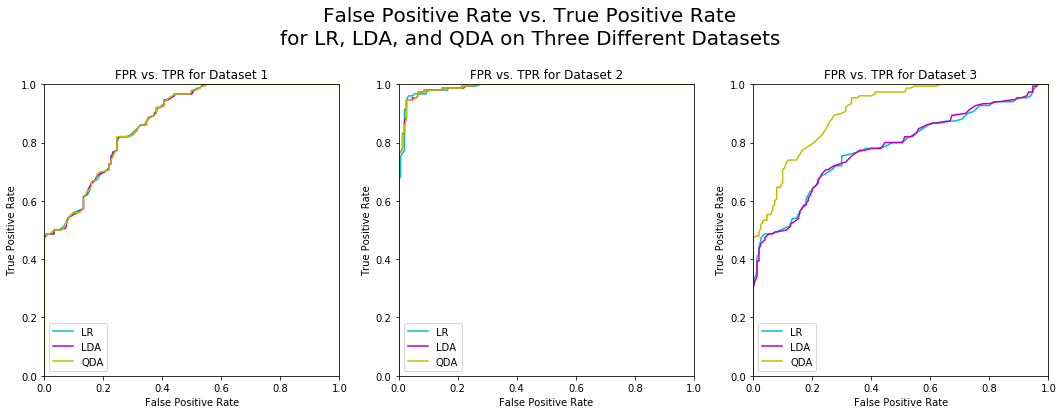

In [12]:
# create the overall figure
fig = plt.figure(figsize=(18,6))
fig.suptitle('False Positive Rate vs. True Positive Rate\nfor LR, LDA, and QDA on Three Different Datasets', fontsize=20)
fig.subplots_adjust(top=0.8)

# we need three subplots (one for each dataset)
ax = [
    fig.add_subplot(131),
    fig.add_subplot(132),
    fig.add_subplot(133)
]

# so we can label our models
labels = {0: 'LR', 1: 'LDA', 2: 'QDA'}
colors = {'LR': 'c', 'LDA': 'm', 'QDA': 'y'}

# dataset 1
n = 0
for r in (roc1_lr, roc1_lda, roc1_qda):
    ax[0].plot(r['False Positive Rate'], r['True Positive Rate'], label=labels[n], color=colors[labels[n]])
    n += 1

# dataset 2
n = 0
for r in (roc2_lr, roc2_lda, roc2_qda):
    ax[1].plot(r['False Positive Rate'], r['True Positive Rate'], label=labels[n], color=colors[labels[n]])
    n += 1

# dataset 3
n = 0
for r in (roc3_lr, roc3_lda, roc3_qda):
    ax[2].plot(r['False Positive Rate'], r['True Positive Rate'], label=labels[n], color=colors[labels[n]])
    n += 1

# pretty-fy the plots
for i in range(3):
    ax[i].axis([0, 1, 0, 1])
    ax[i].set_title("FPR vs. TPR for Dataset " + str(i + 1))
    ax[i].set_xlabel("False Positive Rate")
    ax[i].set_ylabel("True Positive Rate")
    ax[i].legend(loc=3)

## Step 10:
Develop a function to compute Area Under the Curve (AUC) for ROCs

In [13]:
def areaUnderCurve(fpr, tpr):  
    return metrics.auc(fpr, tpr)

Report the AUC for each classifier

In [14]:
auc1 = []
auc2 = []
auc3 = []

# dataset 1
for r in (roc1_lr, roc1_lda, roc1_qda):
    auc1.append(areaUnderCurve(r['False Positive Rate'], r['True Positive Rate']))

# dataset 2
for r in (roc2_lr, roc2_lda, roc2_qda):
    auc2.append(areaUnderCurve(r['False Positive Rate'], r['True Positive Rate']))

# dataset 3
for r in (roc3_lr, roc3_lda, roc3_qda):
    auc3.append(areaUnderCurve(r['False Positive Rate'], r['True Positive Rate']))

print(auc1)
print(auc2)
print(auc3)

[0.8748444444444444, 0.8744444444444444, 0.8746666666666667]
[0.9891777777777778, 0.99, 0.9899555555555558]
[0.7797555555555555, 0.7808444444444445, 0.9066222222222222]


#### State your assumptions about how you built the AUC computation.
Honestly, I guess the only assumption I made is that scikit-learn's AUC function is accurate. I found the AUC function [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html), and I don't have any reason to think it is inaccurate.

## Step 11:
For each model, determine the probability threshold(s) for which each of {Accuracy, Precision, Recall, F-Measure} is maximized

In [15]:
min_thresholds1 = []
min_thresholds2 = []
min_thresholds3 = []

attrs = {0: 'Accuracy', 1: 'Precision', 2: 'True Positive Rate', 3: 'F-Measure'}

""" 
dataset 1
"""
n = 0

# for each model...
for r in (roc1_lr, roc1_lda, roc1_qda):
    # we need four minimum threshold values
    min_thresholds1.append([])
    
    # for each attribute...
    for i in range(len(attrs)):
        # build a dataframe from `r` that only contains rows in which the attribute is maximized
        r_attr = r[r[attrs[i]] == r[attrs[i]].max()]
        
        # grab the minimum threshold from this new dataframe
        min_thresholds1[n].append(r_attr['Probability Threshold'].min())

    n += 1

# put the minimum thresholds into a labeled dataframe
min_thresholds1 = pd.DataFrame(
    np.array(min_thresholds1).T,
    columns=['LR', 'LDA', 'QDA'],
    index=[attrs[0], attrs[1], attrs[2], attrs[3]]
)

""" 
dataset 2
"""
n = 0

# for each model...
for r in (roc2_lr, roc2_lda, roc2_qda):
    # we need four minimum threshold values
    min_thresholds2.append([])
    
    # for each attribute...
    for i in range(len(attrs)):
        # build a dataframe from `r` that only contains rows in which the attribute is maximized
        r_attr = r[r[attrs[i]] == r[attrs[i]].max()]
        
        # grab the minimum threshold from this new dataframe
        min_thresholds2[n].append(r_attr['Probability Threshold'].min())

    n += 1

# put the minimum thresholds into a labeled dataframe
min_thresholds2 = pd.DataFrame(
    np.array(min_thresholds2).T,
    columns=['LR', 'LDA', 'QDA'],
    index=[attrs[0], attrs[1], attrs[2], attrs[3]]
)

""" 
dataset 3
"""
n = 0

# for each model...
for r in (roc3_lr, roc3_lda, roc3_qda):
    # we need four minimum threshold values
    min_thresholds3.append([])
    
    # for each attribute...
    for i in range(len(attrs)):
        # build a dataframe from `r` that only contains rows in which the attribute is maximized
        r_attr = r[r[attrs[i]] == r[attrs[i]].max()]
        
        # grab the minimum threshold from this new dataframe
        min_thresholds3[n].append(r_attr['Probability Threshold'].min())

    n += 1

# put the minimum thresholds into a labeled dataframe
min_thresholds3 = pd.DataFrame(
    np.array(min_thresholds3).T,
    columns=['LR', 'LDA', 'QDA'],
    index=[attrs[0], attrs[1], attrs[2], attrs[3]]
)

print(min_thresholds1, "\n")
print(min_thresholds2, "\n")
print(min_thresholds3)

                          LR       LDA       QDA
Accuracy            0.546128  0.555370  0.544274
Precision           0.799307  0.861353  0.868233
True Positive Rate  0.039770  0.012498  0.023975
F-Measure           0.367965  0.338221  0.328301 

                          LR           LDA           QDA
Accuracy            0.524872  6.666648e-01  6.262533e-01
Precision           0.877275  9.696939e-01  9.595816e-01
True Positive Rate  0.001301  8.296479e-07  9.722139e-08
F-Measure           0.524872  6.666648e-01  6.262533e-01 

                          LR       LDA           QDA
Accuracy            0.420962  0.446287  3.030303e-01
Precision           0.767842  0.756180  9.090909e-01
True Positive Rate  0.064708  0.061269  1.534515e-17
F-Measure           0.420962  0.399334  3.030303e-01


Report a confusion matrix table of predicted class vs. true class

In [16]:
def confusionMatrix(min_thresholds, model, roc, dataset):
    # up to four thresholds per model
    for threshold in min_thresholds[model].unique():
        # find the row with the threshold in question
        o = roc[roc['Probability Threshold'] == threshold]

        # pull the true/false positive/negative counts from the row
        tpc = np.asscalar(o['True Positive Count'])
        fpc = np.asscalar(o['False Positive Count'])
        tnc = np.asscalar(o['True Negative Count'])
        fnc = np.asscalar(o['False Negative Count'])

        # sum the predicted/actual positive/negative values
        # additionally, compute the total
        ppc = tpc + fpc
        pnc = fnc + tnc
        apc = tpc + fnc
        anc = fpc + tnc
        total = apc + anc

        # build and annotate a dataframe
        confusion = pd.DataFrame(
            np.array([(tpc, fpc, ppc), (tnc, fnc, pnc), (apc, anc, total)]),
            columns=['aP', 'aN', 'total'],
            index=['pP', 'pN', 'total']
        )
        
        # save the attributes that `threshold` maximizes and then convert the list into a string
        maximized = min_thresholds[min_thresholds[model] == threshold].index
        maximized = np.array2string(maximized)

        # output the matrix
        print("------ Dataset  : " + str(dataset))
        print("------ Model    : " + model)
        print("------ Threshold: " + str(np.asscalar(o['Probability Threshold'])))
        print("------ Maximizes: " + maximized + "\n")
        print(confusion, "\n")

# dataset 1
confusionMatrix(min_thresholds1, 'LR', roc1_lr, 1)
confusionMatrix(min_thresholds1, 'LDA', roc1_lda, 1)
confusionMatrix(min_thresholds1, 'QDA', roc1_qda, 1)

# dataset 2
confusionMatrix(min_thresholds2, 'LR', roc2_lr, 2)
confusionMatrix(min_thresholds2, 'LDA', roc2_lda, 2)
confusionMatrix(min_thresholds2, 'QDA', roc2_qda, 2)

# dataset 3
confusionMatrix(min_thresholds3, 'LR', roc3_lr, 3)
confusionMatrix(min_thresholds3, 'LDA', roc3_lda, 3)
confusionMatrix(min_thresholds3, 'QDA', roc3_qda, 3)

------ Dataset  : 1
------ Model    : LR
------ Threshold: 0.5461282241417107
------ Maximizes: ['Accuracy']

          aP     aN  total
pP     123.0   38.0  161.0
pN     112.0   27.0  139.0
total  150.0  150.0  300.0 

------ Dataset  : 1
------ Model    : LR
------ Threshold: 0.7993071664352572
------ Maximizes: ['Precision']

          aP     aN  total
pP      71.0    0.0   71.0
pN     150.0   79.0  229.0
total  150.0  150.0  300.0 

------ Dataset  : 1
------ Model    : LR
------ Threshold: 0.03977033955461777
------ Maximizes: ['True Positive Rate']

          aP     aN  total
pP     150.0  150.0  300.0
pN       0.0    0.0    0.0
total  150.0  150.0  300.0 

------ Dataset  : 1
------ Model    : LR
------ Threshold: 0.36796526474995583
------ Maximizes: ['F-Measure']

          aP     aN  total
pP     145.0   66.0  211.0
pN      84.0    5.0   89.0
total  150.0  150.0  300.0 

------ Dataset  : 1
------ Model    : LDA
------ Threshold: 0.5553702978777361
------ Maximizes: ['Accurac

#### Explain what tradeoff is occurring when we set a probability threshold differently to maximize each of those performance measures.

todo

## Step 12:
Annotate the ROC graph

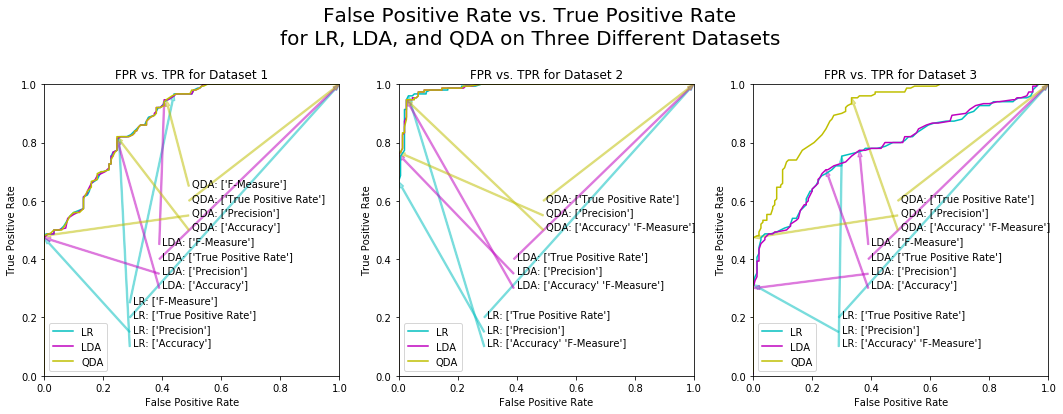

In [17]:
def annotateROC(min_thresholds, model, roc, dataset, lx, ly):
    # offset of label's y-coordinate
    diff = 0
    
    # up to four thresholds per model
    for threshold in min_thresholds[model].unique():
        # find the row with the threshold in question
        o = roc[roc['Probability Threshold'] == threshold]

        # pull the true/false positive rates from the row
        fpr = np.asscalar(o['False Positive Rate'])
        tpr = np.asscalar(o['True Positive Rate'])

        # save the attributes that `threshold` maximizes and then convert the list into a string
        maximized = min_thresholds[min_thresholds[model] == threshold].index
        maximized = np.array2string(maximized)

        # label the annotated point
        label = model + ': ' + maximized

        # put a label at xytext; draw an arrow from xytext to xy
        ax[dataset - 1].annotate(label, xy=(fpr, tpr), xytext=(lx, ly + diff))
        
        # the arrow's starting location
        xarrow = lx - 0.01 # just to the left of the label
        yarrow = ly + diff # same y-coordinate as the label
        
        # draw a semi-transparent, colored arrow from the starting location to the desired point
        ax[dataset - 1].arrow(xarrow, yarrow, fpr - xarrow, tpr - yarrow, alpha=0.4,
            width=0.005, length_includes_head=True, color=colors[model])
        
        # offset the next label
        diff += 0.05

# dataset 1
annotateROC(min_thresholds1, 'LR', roc1_lr, 1, 0.3, 0.1)
annotateROC(min_thresholds1, 'LDA', roc1_lda, 1, 0.4, 0.3)
annotateROC(min_thresholds1, 'QDA', roc1_qda, 1, 0.5, 0.5)

# dataset 2
annotateROC(min_thresholds2, 'LR', roc2_lr, 2, 0.3, 0.1)
annotateROC(min_thresholds2, 'LDA', roc2_lda, 2, 0.4, 0.3)
annotateROC(min_thresholds2, 'QDA', roc2_qda, 2, 0.5, 0.5)

# dataset 3
annotateROC(min_thresholds3, 'LR', roc3_lr, 3, 0.3, 0.1)
annotateROC(min_thresholds3, 'LDA', roc3_lda, 3, 0.4, 0.3)
annotateROC(min_thresholds3, 'QDA', roc3_qda, 3, 0.5, 0.5)

# display the plot
fig

#### What do you notice about the points?
todo

#### Where are they along the ROC curves?
todo

## Step 13:

#### a. For each dataset, describe which model you recommend the school use for their decision-making (and why).
todo

#### b. Indicate which probability threshold (or values) you would recommend they set the classifier to use if they wanted to balance the risk of false positives and false negatives.
todo